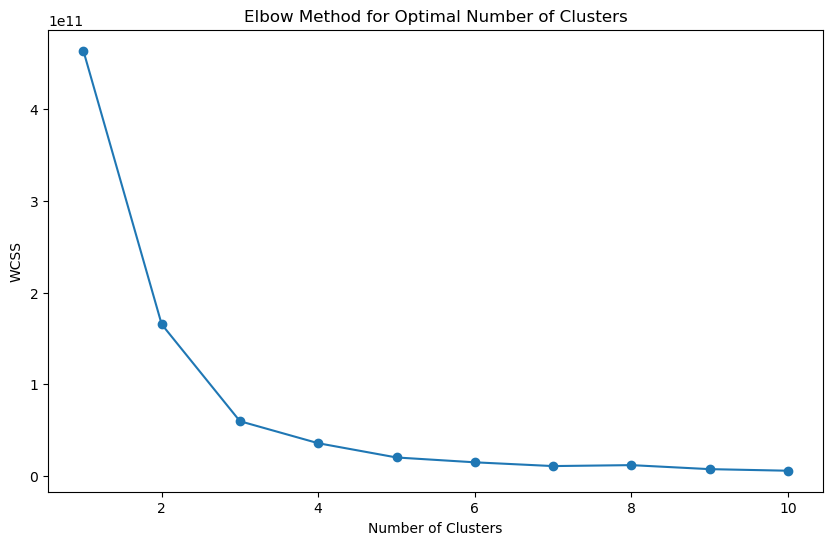

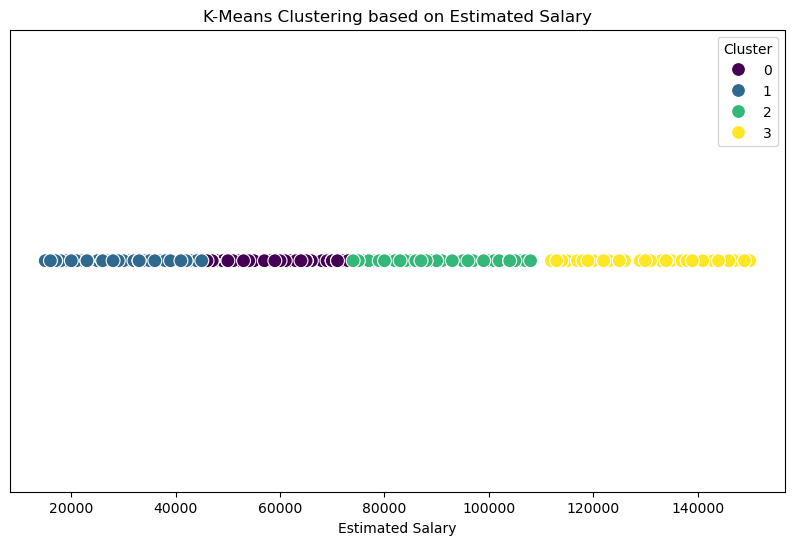

    User ID  Gender  Age  EstimatedSalary  Cluster
0  15624510       1   19            19000        1
1  15810944       1   35            20000        1
2  15668575       0   26            43000        1
3  15603246       0   27            57000        0
4  15804002       1   19            76000        2


In [7]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')  # Adjust the path as needed

# Step 2: Data Preprocessing

# Handle missing values (if any) - Fill numeric columns with the mean, categorical columns with the mode
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical columns with the mode

# Step 3: Label Encoding for the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Step 4: Apply K-Means clustering based on 'EstimatedSalary' (you can add more features for clustering)
X = df[['EstimatedSalary']]  # You can include more features if necessary

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares (WCSS)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 5: Apply K-Means clustering (let's choose 5 clusters as an example)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Step 6: Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['EstimatedSalary'], y=[0] * len(df), hue=df['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering based on Estimated Salary')
plt.xlabel('Estimated Salary')
plt.yticks([])
plt.show()

# Step 7: View the grouped data
print(df[['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Cluster']].head())
